In [1]:
import math
import numpy   as np
import pandas  as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# <a id='0'> Content
Matplotlib is good for understanding the basics elements of plots in Python. But we will quickly move on to more powerful libraries like Pandas and Seaborn, which support dataframes and various statistical analyses.
- <a href='#m'> Matplotlib
- <a href='#p'> Pandas 
- <a href='#s'> Seaborn

## Highlights
- <a href='#ma'> Annotation and Drawing on a plot
- <a href='#sw'> When Boxplot beats barplot
- <a href='#ss'> Scatter plot with regression line

## A Brief matplotlib API Primer

### Figures and Subplots

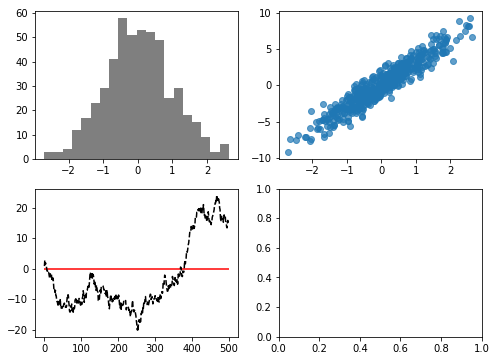

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(8,6))

N=500
x = np.random.randn(N)
y = 3*x + np.random.randn(N)
np.random.seed(42)

axes[0,0].hist(x, bins=20, color='k', alpha=0.5)
axes[0,1].scatter(x, y, alpha=0.7)
axes[1,0].plot(x.cumsum(), 'k--');
axes[1,0].hlines(0, 0, N, color='r');  # hlines(y, xmin, xmax)

#### Share x-axis or y-axis for subplots

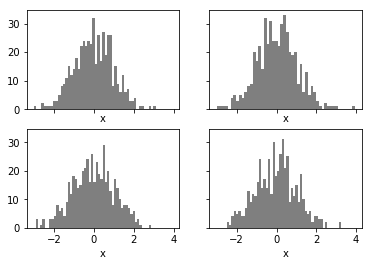

In [6]:
figs, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
        axes[i, j].set_xlabel('x')

### Colors, Markers, and Line Styles

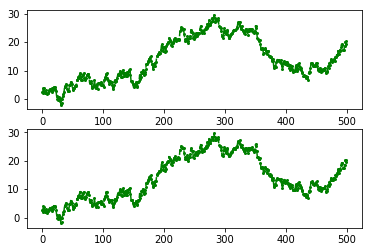

In [16]:
x = np.random.randn(N)
_, axes = plt.subplots(2,1)
axes[0].plot(x.cumsum(), color='g', markersize=2, marker='o',  linestyle='dashed');
axes[1].plot(x.cumsum(), 'go--',    markersize=2); # easier but more implicit

### Ticks, Labels, Title, and Legend

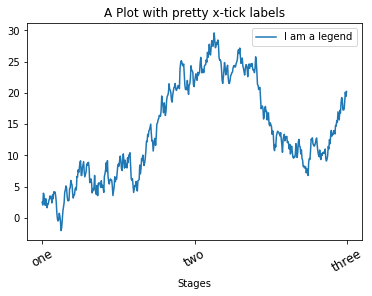

In [31]:
_, ax = plt.subplots(1,1)

ax.plot(x.cumsum(), label='I am a legend')

ticks  = ax.set_xticks([0, 250, 500])
labels = ax.set_xticklabels(['one', 'two', 'three'],
                              rotation=30, fontsize='large')
ax.set_title('A Plot with pretty x-tick labels')
ax.set_xlabel('Stages')
ax.legend(loc='best')

plt.savefig('figpath.png', dpi=200, bbox_inches='tight')

In [ ]:
# Put your favorite setup into a dictionary
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

### <a id='ma'> Annotations and Drawing on a plot
- <a href='#0'> Back to TOC

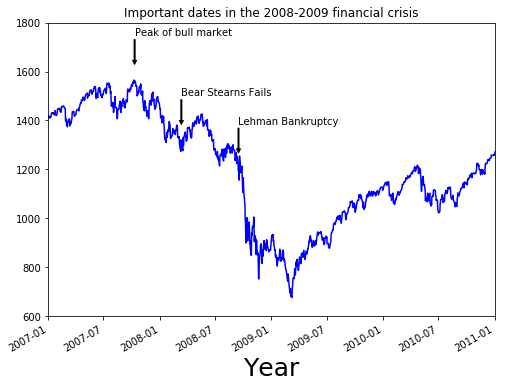

In [49]:
from datetime import datetime
data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)

# Series with date index
spx = data['SPX']

# plotting with Pandas
spx.plot(style='b-', figsize=(8,6));

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12),  'Bear Stearns Fails'),
    (datetime(2008, 9, 15),  'Lehman Bankruptcy')
]

for date, label in crisis_data:    
    plt.annotate(label,
                xy     = (date, spx[date] + 75),
                xytext = (date, spx[date] + 225),
                arrowprops = dict(facecolor='black', headwidth=4, width=1, headlength=4),
                horizontalalignment='left', verticalalignment='top'
    );
    
plt.xlabel('Year', fontsize=25)
plt.xlim(['1/1/2007', '1/1/2011'])
plt.ylim([600, 1800])
plt.title('Important dates in the 2008-2009 financial crisis')
plt.xticks(fontsize=10);

### Saving Plots to File

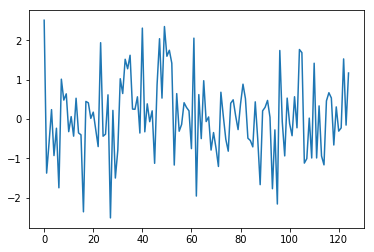

In [35]:
plt.plot(x[::4])
plt.savefig('figpath.png', dpi=200, bbox_inches='tight')

### matplotlib Configuration

In [ ]:
plt.rc('figure', figsize=(10, 10))

font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 'small'}
plt.rc('font', **font_options)

## <a id='p'> Plotting with Pandas
- <a href='#0'> Back to TOC

Pandas' true strength lies in the mass operation of plotting multiple columns of data all at once conveniently, and then utilizing the row index and column labels for easy labeling of the plot.

### Line Plots
Good for showing trends.

In [69]:
# DataFrame
df = pd.DataFrame(np.random.randn(10, 3).cumsum(0),
                  columns=['A', 'B', 'C'],
                  index=np.arange(0, 100, 10))
df.head(3)

,A,B,C
0,-1.709226,0.391698,-0.089203
10,-0.098933,-0.547867,-1.897499
20,0.519135,-0.201340,-2.905932


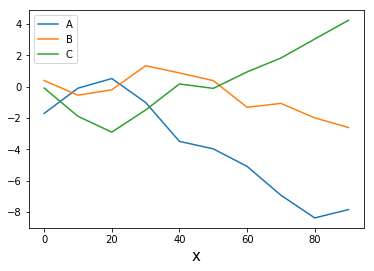

In [72]:
df.plot(legend=True)
plt.xlabel('x', fontsize=15);

### Bar Plots

In [57]:
df = pd.DataFrame(np.random.rand(6, 3),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C'], 
                  name='Genus'))
df.head(3)

Genus,A,B,C
one,0.949955,0.805637,0.377545
two,0.788686,0.351442,0.167100
three,0.033393,0.385717,0.903559


Two categorical varibles

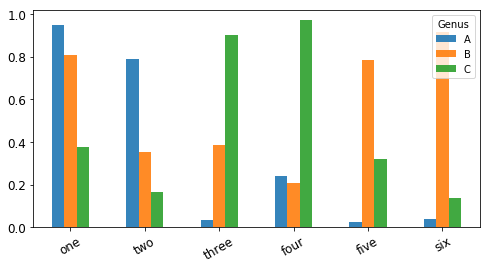

In [64]:
df.plot.bar(figsize=(8,4), alpha=0.9, rot=30, fontsize=12);

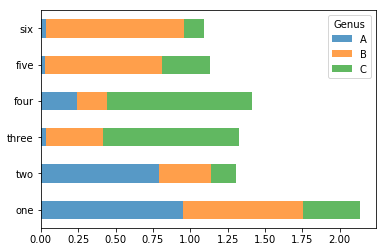

In [65]:
# when the sum of the variables is important to show
df.plot.barh(stacked=True, alpha=0.75);

## <a id='p'> Plotting with Seaborn
- <a href='#0'> Back to TOC

It supports mass operations on dataframes just like Pandas, but it also supports lots more popular statistical analyses and visualizations.

### <a id='sw'> When Boxplot beats barplot
Boxplot is superior for detecting outliers.
- <a href='#0'> Back to TOC

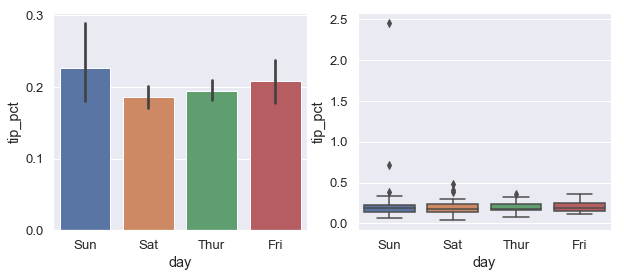

In [99]:
tips = pd.read_csv('examples/tips.csv')

# division of Series is convenient
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

_, axes = plt.subplots(1,2, figsize=(10,4))
sns.barplot(y='tip_pct', x='day', data=tips, ax=axes[0]);
sns.boxplot(y='tip_pct', x='day', data=tips, ax=axes[1]);
sns.set(font_scale=1.5)

#### Add one more categorical variable

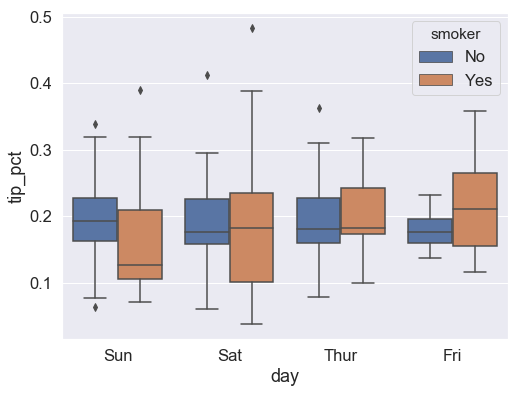

In [107]:
# Drop the outliers where tips are more than 50%
tips_no_outlier = tips.loc[tips['tip_pct']<0.5]

plt.figure(figsize=(8,6))
sns.boxplot(y='tip_pct', x='day', hue='smoker', data=tips_no_outlier);

### Histograms and KDE estimate
Matplotlib and Pandas do not have good support for kde estimation, so our best bet is using Seaborn.

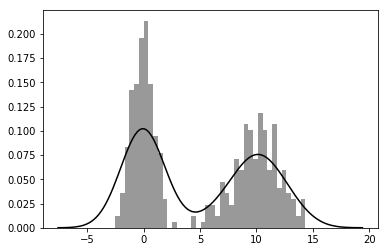

In [73]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=40, color='k', kde=True);

### <a id='ss'> Scatter Plot with the Regression line
Do people tip less in larger groups? Or simply because the bill is larger?
- <a href='#0'> Back to TOC

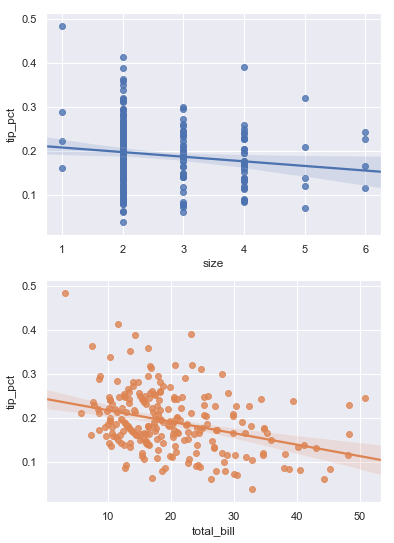

In [159]:
# data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
# trans_data = np.log(data).diff(axis=0).dropna() # difference b/t sample i and i+1
# trans_data[-5:]
_, axes = plt.subplots(2,1, sharey=True, figsize=(6,9))

sns.regplot(x='size',       y='tip_pct', data=tips_no_outlier, ax=axes[0]);
sns.regplot(x='total_bill', y='tip_pct', data=tips_no_outlier, ax=axes[1]);

### Multi-variate analysis
#### Facet Grids

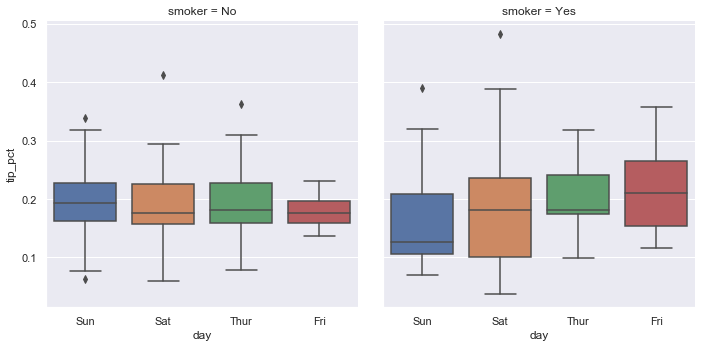

In [163]:
sns.factorplot(x='day', y='tip_pct',  col='smoker',
               kind='box', data=tips[tips['tip_pct'] < 0.5]);

In [135]:
tips_no_outlier.groupby(['day','smoker']).size()

day   smoker
Fri   No         4
      Yes       15
Sat   No        45
      Yes       42
Sun   No        57
      Yes       17
Thur  No        45
      Yes       17
dtype: int64

#### Relational plot
Conditioned Scatter plot that covers 3 variables: <br>
Flight Passengers, year, and month of the year.
July and August are the HOT season for traveling!

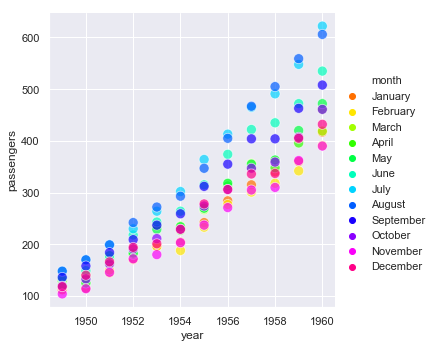

In [166]:
df = sns.load_dataset('flights')

sns.relplot(x='year', y='passengers', hue='month', data=df, palette='hsv', alpha=0.7, s=100);
sns.set(font_scale=1)

- <a href='#0'> Back to TOC